### Student Information
Name: Manuel Giambi

Student ID: 109065430

GitHub ID: HikariNoMJ14

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [2]:
# Fetch every 5th 'category' and display the last 10
a = X['category'].loc[::5][-10:]
b = X.loc[::5, 'category'][-10:]
c = X[::5][-10:]['category']
d = X.category.loc[::5][-10:]
e = X.iloc[::5, 1][-10:]
f = X.loc[X.index % 5 == 0, 'category'][-10:]
g = X.iloc[range(0,len(X), 5), pow(2,0)][-10:]

In [3]:
if a.equals(b) and b.equals(c) and c.equals(d) and d.equals(e) and e.equals(f) and f.equals(g):
    print("All expressions are equivalent")

All expressions are equivalent


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df.isnull()

id  missing_example
0  False             True
1  False             True
2  False            False
3  False            False
4  False             True
5  False            False

In [5]:
NA_df['missing_example'].apply(type)

0       <class 'float'>
1       <class 'float'>
2         <class 'str'>
3         <class 'str'>
4    <class 'NoneType'>
5         <class 'str'>
Name: missing_example, dtype: object

As shown on the cell output above, the cells that have not been identified as `True` by `pd.isnull` are of type `str`. Also, we can see that although `pd.isnull` outputs `True` for both `np.nan` and  `None`, Pandas preserves the type that was initially input into the dictionary. If we don't supply value for `missing_example` to the dictionary (as in row with id `B`) we can see that Pandas automatically adds a `np.nan` cell to the DataFrame; from this we can assume this is Pandas' preferred representation for missing values.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
X_sample = X.sample(n=1000)

In [7]:
pd.set_option('display.width', 700)
print("Full dataset")
print(X.head())
print(X.shape)
print('------------')
print("Sample")
print(X_sample.head())
print(X_sample.shape)
print('------------')

Full dataset
                                                text  category           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3  soc.religion.christian
(2257, 3)
------------
Sample
                                                   text  category  category_name
1137  From: dfitts@carson.u.washington.edu (Douglas ...         2        sci.med
441   From: keith@cco.caltech.edu (Keith Allan Schne...         0    alt.atheism
2068  From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1  comp.graphics
2103  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2        sci.med
1515  From: kmr4@po.CWRU.edu (

The first thing we can notice is that of course the dataframe contains less records. Also we can see that the index is not sorted anymore, and it doesn't contain all values; this means that we can't use `.iloc` and `.loc` interchangeably for rows anymore.

In [8]:
print("Full dataframe")
X_cat_dist = X['category'].value_counts()
print(X_cat_dist)
print(f"Standard deviation: {np.std(X_cat_dist)}")

Full dataframe
3    599
2    594
1    584
0    480
Name: category, dtype: int64
Standard deviation: 48.940652835858245


In [9]:
X_sample_cat_dist = X_sample['category'].value_counts()
print(X_sample_cat_dist)
print(f"Standard deviation: {np.std(X_sample_cat_dist)}")

3    287
1    248
2    243
0    222
Name: category, dtype: int64
Standard deviation: 23.484037131634757


If we look at the distribution of the different categories, we can see that in `X_sample` the standard deviation decreased, leading to a higher balance between classes.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

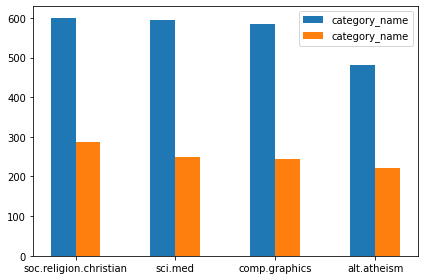

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(len(X.category_name.value_counts()))
width = 0.25
max_y = X.category_name.value_counts().max()

fig, ax = plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(X.category_name.value_counts().index)
ax.bar(x=x - width/2, height=X.category_name.value_counts(), width=width, label='category_name')
ax.bar(x=x + width/2, height=X_sample.category_name.value_counts(),  width=width, label='category_name')
fig.tight_layout()
ax.legend()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
feature_names = count_vect.get_feature_names()
X_counts_array = X_counts[0:5, 0:100].toarray()

def get_word(array, index):
    ones = np.where(array == 1)[0]
    return feature_names[ones[index]]

get_word(X_counts_array[4], index=1)

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

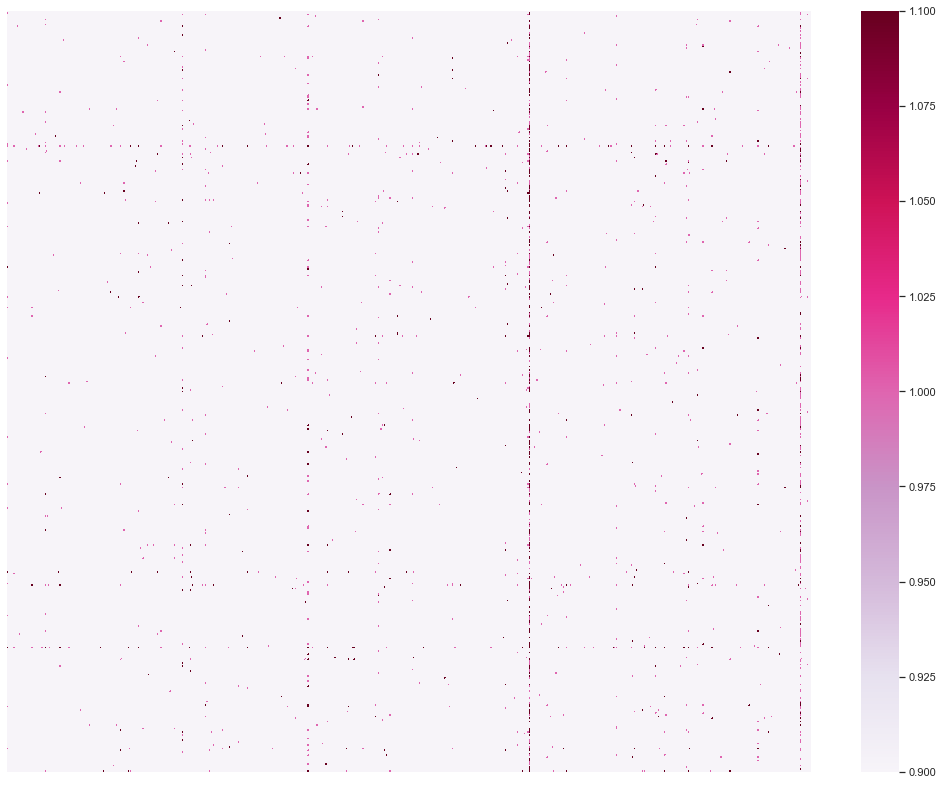

In [12]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()
df_full = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw = pd.DataFrame(plot_z[::5,::50], columns = plot_x[::50], index = plot_y[::5])
plt.subplots(figsize=(18, 14))
sns.set(rc={},style="dark")
ax = sns.heatmap(data=df_todraw,
                 cmap="PuRd", xticklabels=False, yticklabels=False, annot=False,
                 vmin=1, vmax=1)

Visualizing such a big matrix is next to impossible, and to make it more manageable we can downsample it. We are going to lose some information, but we can still get some nice high-level overview of the data we're dealing with.
This visualization gives us an idea of the sparsity of the matrix; we can also see that some term appears in many documents, while others are much rarer.

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

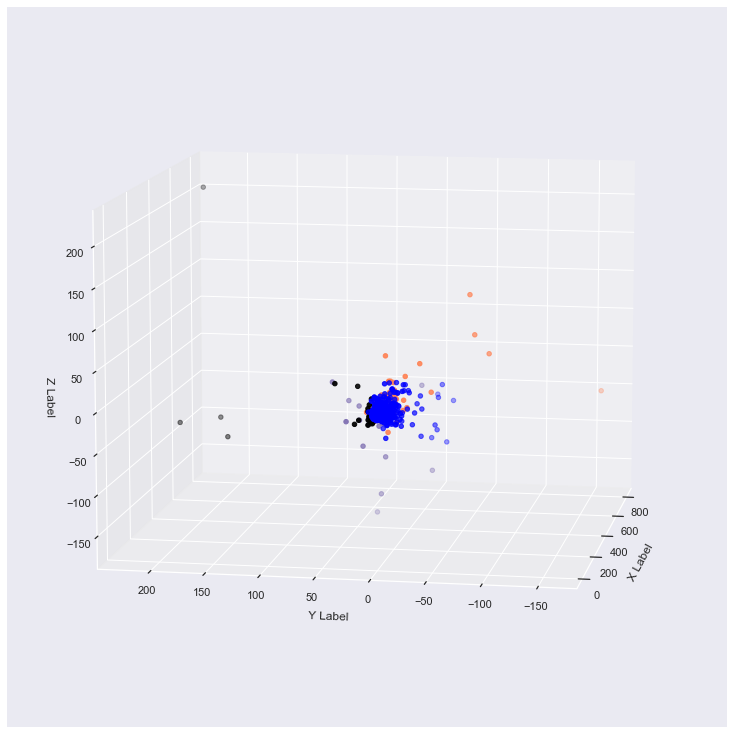

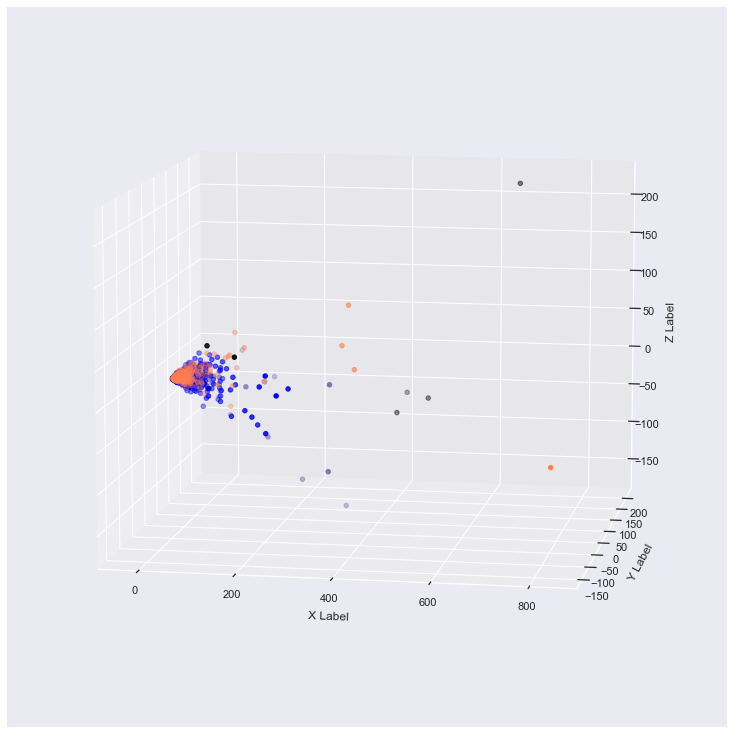

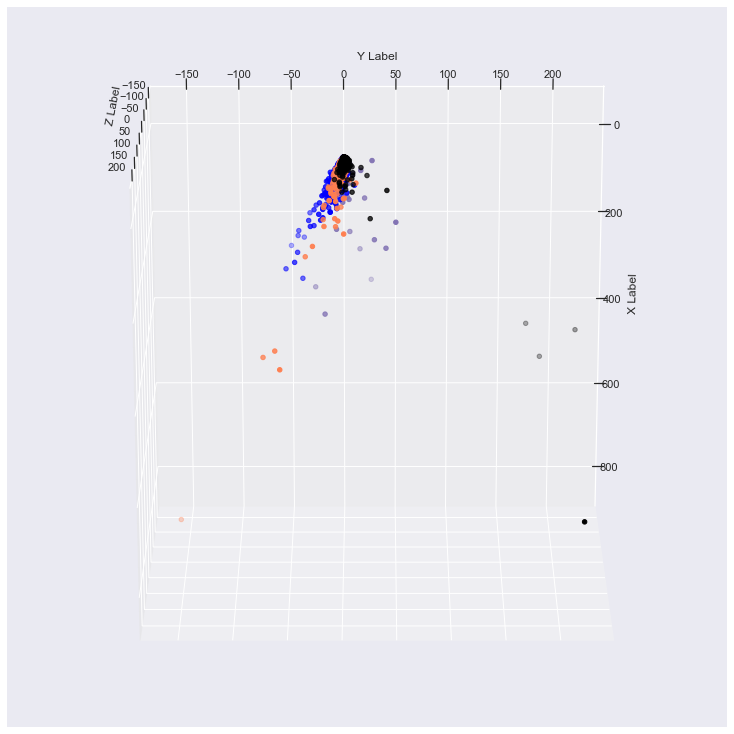

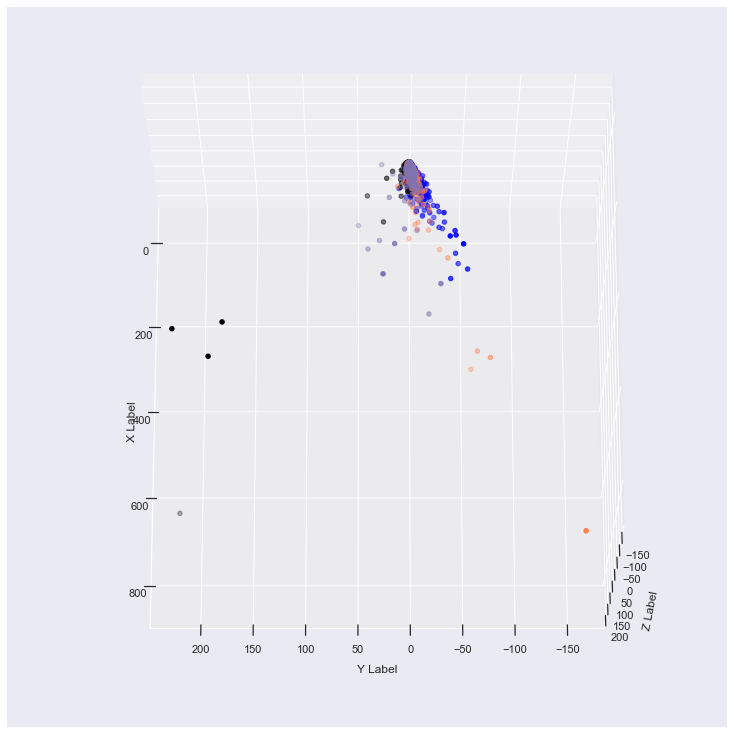

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from helpers.text_analysis import make_3d_plot

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

make_3d_plot(X_reduced, X['category_name'], categories, 10, 190)
make_3d_plot(X_reduced, X['category_name'], categories, 10, 280)
make_3d_plot(X_reduced, X['category_name'], categories, 110, 0)
make_3d_plot(X_reduced, X['category_name'], categories, 290, 0)

Using 3 dimensions instead of 2 makes the plot less messy, and plotting the 3d scatterplot using different angles we can better appreciate the separation between the classes. For each of the 4 angles I chose, we can clearly see that one color stands out. Choosing a rotation angle that isn't orthogonal to any of the axes allows us to see for which values of X,Y or Z a certain category dominates (e.g. blue points are concentrated in lower values of X).
We can also see that most of the data is concentrated in one area, with a few outliers clearly separated into different regions. It would be interesting to identify the outliers and remove them from the visualization, so we can zoom in on the denser area; this might give us further insight.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [14]:
# Very inefficient, commenting out and replacing with a faster method 

# term_frequencies = []
# for j in range(0,X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:,j].toarray()))
# term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [15]:
import plotly.express as px

frequency_df = pd.DataFrame(df_full.sum(axis=0).astype('int'), columns=['frequency'])
frequency_df['terms'] = count_vect.get_feature_names()

fig = px.bar(frequency_df, x='terms', y='frequency')
fig.update_layout(
    xaxis = dict(
        range=(0,50)
    )
)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [16]:
frequency_reduced_df = frequency_df[frequency_df['frequency'] > 100]

fig = px.bar(frequency_reduced_df, x='terms', y='frequency')
fig.update_layout(
    xaxis = dict(
        range=(0,50)
    )
)
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [17]:
fig = px.bar(frequency_reduced_df.sort_values('frequency', ascending=False), x='terms', y='frequency')
fig.update_layout(
    xaxis = dict(
        range=(0,30)
    )
)
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [18]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

The binarization seems to work when using `category_name`, as long as the same column is used both in the `fit` and the `transform` method.

### >>> **Part 2**

In [19]:
import pandas as pd

def load_data(data_source, delimiter='\t'):
    df = pd.read_csv(f'./data/sentiment labelled sentences/{data_source}_labelled.txt', delimiter=delimiter, header=None, dtype={'sentence': 'str', 'score': 'float'}, names=['sentence', 'score'])
    df['source'] = data_source
    return df

# imdb data has a slightly different formatting, so we need to use a different delimiter
df = pd.concat([load_data('yelp'), load_data('imdb', ' \t'), load_data('amazon_cells')])

<ipython-input-19-f1dfead468b3>:4: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



<AxesSubplot:xlabel='score', ylabel='count'>

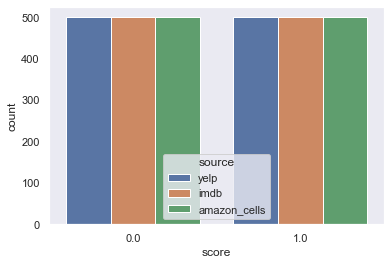

In [20]:
import seaborn as sns

# The dataset (as advertised) is completely balanced in both scores and sources 
sns.countplot(data=df, x='score', hue='source')

In [21]:
df.isnull().sum()

sentence    0
score       0
source      0
dtype: int64

In [22]:
df['sentence'].head(10)

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: sentence, dtype: object

In [23]:
df['sentence_length'] = df['sentence'].apply(len)
print(f"Mean sentence length: {df['sentence_length'].mean()}")
print(f"Sentence length standard deviation: {df['sentence_length'].std()}")

Mean sentence length: 64.938
Sentence length standard deviation: 44.03754372978339


<AxesSubplot:xlabel='sentence_length', ylabel='Density'>

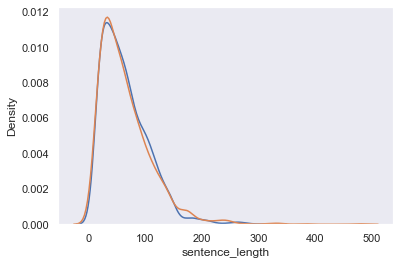

In [24]:
# We can see that the distribution of sentence lengths doesn't change much based on score
sns.kdeplot(df[df['score'] == 0]['sentence_length'])
sns.kdeplot(df[df['score'] == 1]['sentence_length'])

In [25]:
# These are the shortest sentences, which are still valid reviews.
df[df['sentence_length'] == df['sentence_length'].min()]

sentence  score source  sentence_length
125   10/10     1.0   imdb                6
788   10/10     1.0   imdb                6

In [26]:
# We have a few duplicates, but there's no need to remove them, as they are legitimatly common reviews.
df[df.duplicated()]

sentence  score        source  sentence_length
814                                 I love this place.    1.0          yelp               18
816                             The food was terrible.    0.0          yelp               22
843                                   I won't be back.    0.0          yelp               16
846                  I would not recommend this place.    0.0          yelp               33
363                    Definitely worth checking out.     1.0          imdb               31
585                                  Not recommended.     0.0          imdb               17
788                                             10/10     1.0          imdb                6
285                                      Great phone!.    1.0  amazon_cells               13
407                                       Works great.    1.0  amazon_cells               12
524                                      Works great!.    1.0  amazon_cells               13
543                            Don't buy this product.    0.0  amazon_cells               23
744  If you like a loud buzzing to override all you...    0.0  amazon_cells               90
748                                      Does not fit.    0.0  amazon_cells               13
778                              This is a great deal.    1.0  amazon_cells               21
792                                       Great Phone.    1.0  amazon_cells               12
892                   Excellent product for the price.    1.0  amazon_cells               32
896                                       Great phone.    1.0  amazon_cells               12

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# We tokenize the text, removing accents, punctuation, stop_words and making everything lowercase
count_vect = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    strip_accents='ascii'
)
word_counts = count_vect.fit_transform(df.sentence)

In [28]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

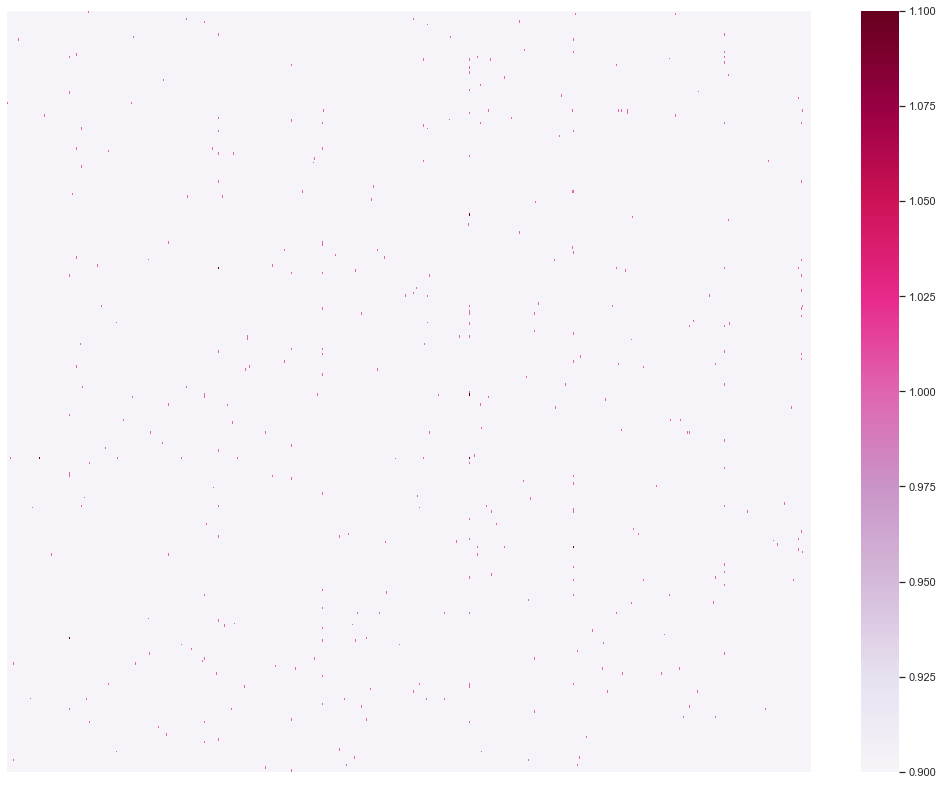

In [29]:
# We can see that the matrix is still quite sparse
docs_to_words_df = pd.DataFrame(
    word_counts.toarray(), 
    columns = count_vect.get_feature_names(), 
    index = df.index)
docs_to_words_df['special_score'] = df['score']
docs_to_words_df['special_source'] = df['source']

plt.subplots(figsize=(18, 14))
sns.set(rc={},style="dark")
ax = sns.heatmap(data=docs_to_words_df.drop(['special_score', 'special_source'], axis=1).sample(frac=0.1),
                 cmap="PuRd", xticklabels=False, yticklabels=False, annot=False,
                 vmin=1, vmax=1)

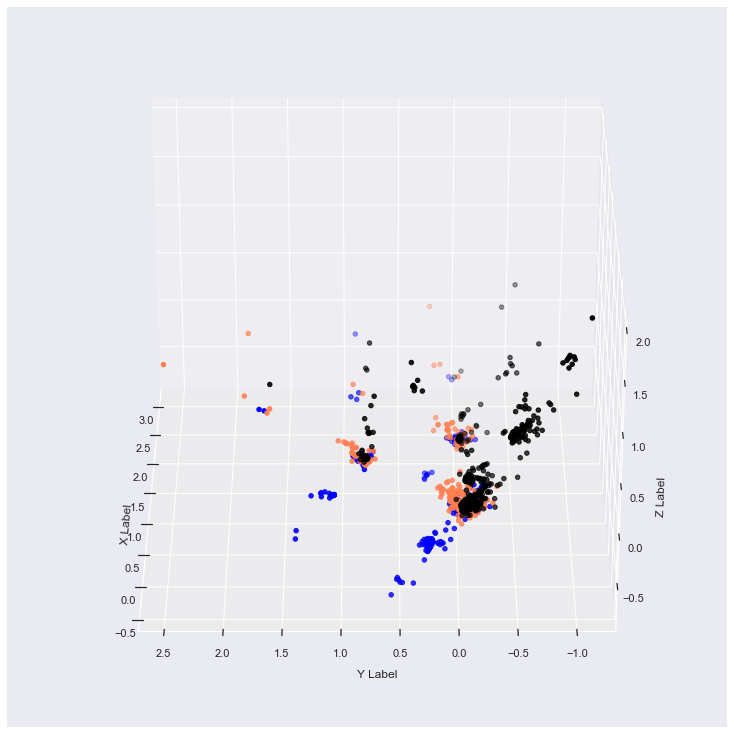

In [30]:
from sklearn.decomposition import PCA

word_counts_reduced = PCA(n_components = 3).fit_transform(word_counts.toarray())

sources = ['yelp', 'amazon_cells', 'imdb']

# 3d plot based on source
make_3d_plot(word_counts_reduced, df['source'], sources, 30, 180)

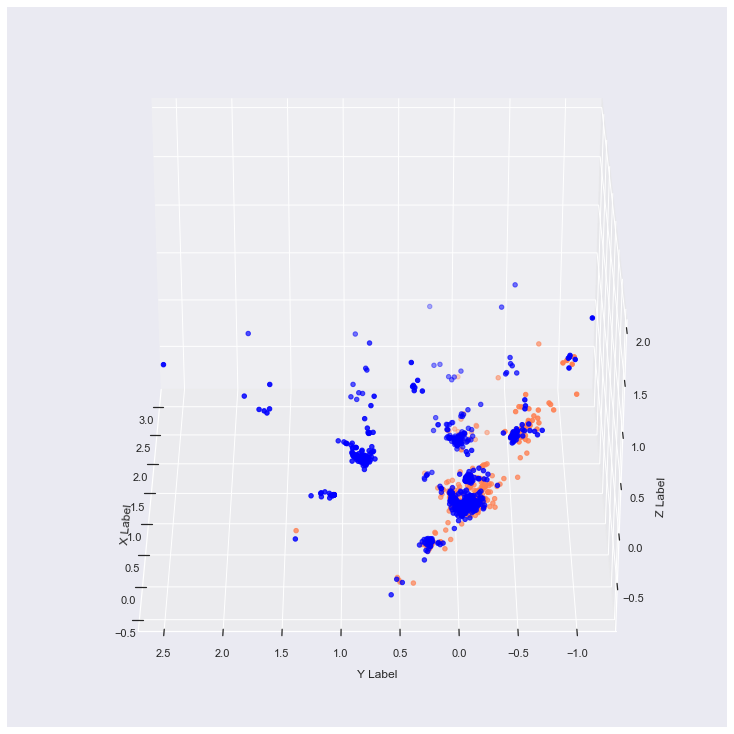

In [31]:
# 3d plot based on score
scores = [0, 1]

make_3d_plot(word_counts_reduced, df['score'], scores, 30, 180)

If we reduce the dimensions to 3 we can see quite a lot of separation which roughly correlates with one the axes:
- 3-4 clear clusters on the x-axis
- 3 clusters on the z-axis
- 3 clusters on the y-axis

If we use different colours for different sources, we can see that most black dots (imdb) have low value for y and varying value for z, whereas blue dots (amazon_cells) have low value for z and varying value for y. Orange dots (yelp) are quite 'central' compared to the other 2 classes.
On the x-axis the separation between sources is less clear.

If we use different colours for different scores, we get a less clear picture, but one thing stands out: blue dots (score 1) are more spread out than orange dots (score 0).

<AxesSubplot:xlabel='frequency', ylabel='Density'>

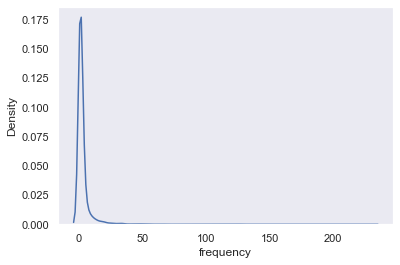

In [32]:
word_frequencies_df = pd.DataFrame(docs_to_words_df.drop(['special_score', 'special_source'], axis=1).sum(axis=0).astype('int'), columns=['frequency'])

# plot distribution of word frequency
sns.kdeplot(word_frequencies_df['frequency'])

<AxesSubplot:xlabel='frequency', ylabel='Density'>

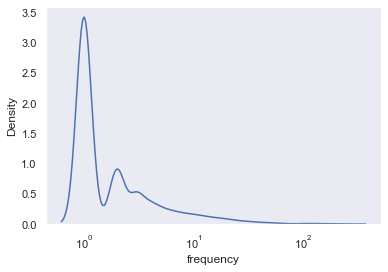

In [33]:
# plot distribution of word frequency with log scale
sns.kdeplot(word_frequencies_df['frequency'], log_scale=True)

### >>> **Part 3**

In [34]:
# Additional exploration and visualization looking at different sources and scores
neg_freq_yelp = dmh.get_frequencies(docs_to_words_df, 0, 'yelp')
neg_freq_amazon = dmh.get_frequencies(docs_to_words_df, 0, 'amazon_cells')
neg_freq_imdb = dmh.get_frequencies(docs_to_words_df, 0, 'imdb')

pos_freq_yelp = dmh.get_frequencies(docs_to_words_df, 1, 'yelp')
pos_freq_amazon = dmh.get_frequencies(docs_to_words_df, 1, 'amazon_cells')
pos_freq_imdb = dmh.get_frequencies(docs_to_words_df, 1, 'imdb')

Negative Yelp reviews word cloud


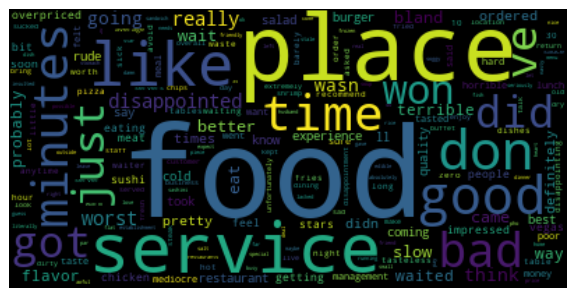

Exclusively Yelp negative reviews word cloud


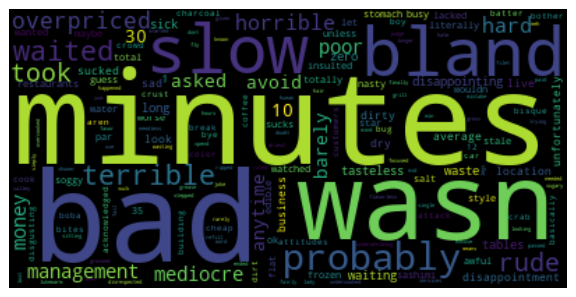

Positive Yelp reviews word cloud


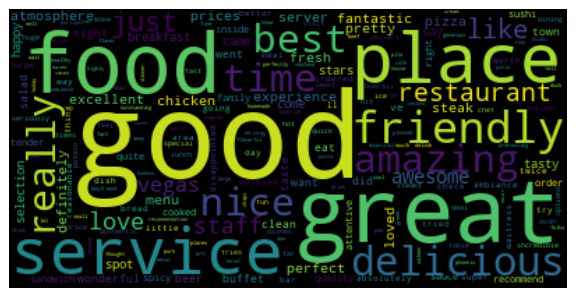

Exclusively Yelp positive reviews word cloud


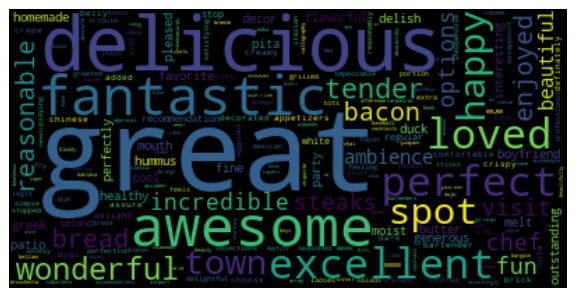

In [35]:
from helpers.text_analysis import plot_word_cloud

# Plot word cloud for Yelp negative sentiment reviews
print("Negative Yelp reviews word cloud")
plot_word_cloud(neg_freq_yelp['frequency'].to_dict())

# Plot word cloud for Yelp negative sentiment reviews, removing words that appear in positive sentiment reviews
print("Exclusively Yelp negative reviews word cloud")
neg_only_freq_yelp = neg_freq_yelp[~neg_freq_yelp.index.isin(pos_freq_yelp.index.tolist())]
plot_word_cloud(neg_only_freq_yelp['frequency'].to_dict())

# Plot word cloud for Yelp positive sentiment reviews
print("Positive Yelp reviews word cloud")
plot_word_cloud(pos_freq_yelp['frequency'].to_dict())

# Plot word cloud for Yelp positive sentiment reviews, removing words that appear in negative sentiment reviews
print("Exclusively Yelp positive reviews word cloud")
pos_only_freq_yelp = pos_freq_yelp[~pos_freq_yelp.index.isin(neg_freq_yelp.index.tolist())]
plot_word_cloud(pos_only_freq_yelp['frequency'].to_dict())

Negative Amazon reviews word cloud


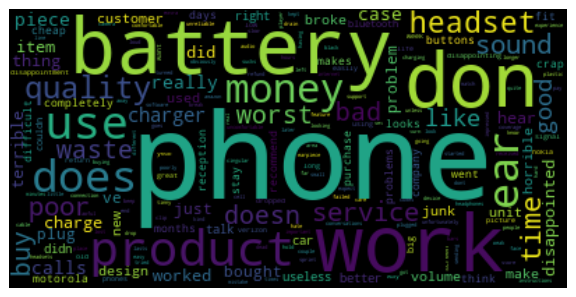

Exclusively Amazon negative reviews word cloud


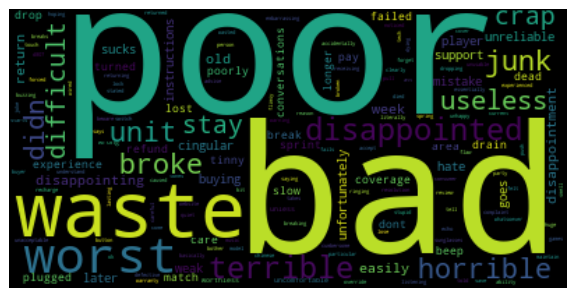

Positive Amazon reviews word cloud


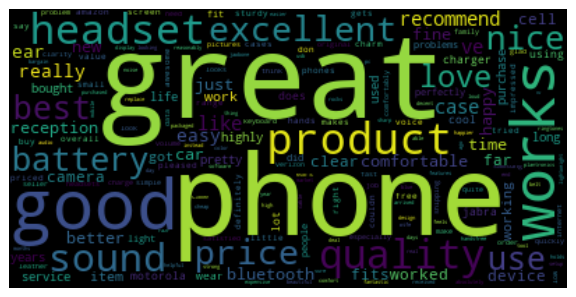

Exclusively Amazon positive reviews word cloud


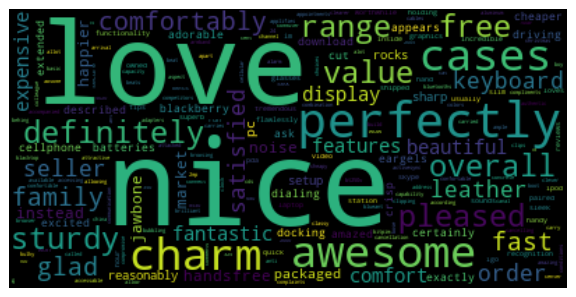

In [36]:
# Plot word cloud for Amazon negative sentiment reviews
print("Negative Amazon reviews word cloud")
plot_word_cloud(neg_freq_amazon['frequency'].to_dict())

# Plot word cloud for Yelp negative sentiment reviews, removing words that appear in positive sentiment reviews
print("Exclusively Amazon negative reviews word cloud")
neg_only_freq_amazon = neg_freq_amazon[~neg_freq_amazon.index.isin(pos_freq_amazon.index.tolist())]
plot_word_cloud(neg_only_freq_amazon['frequency'].to_dict())

# Plot word cloud for Amazon positive sentiment reviews
print("Positive Amazon reviews word cloud")
plot_word_cloud(pos_freq_amazon['frequency'].to_dict())

# Plot word cloud for Amazon positive sentiment reviews, removing words that appear in negative sentiment reviews
print("Exclusively Amazon positive reviews word cloud")
pos_only_freq_amazon = pos_freq_amazon[~pos_freq_amazon.index.isin(neg_freq_amazon.index.tolist())]
plot_word_cloud(pos_only_freq_amazon['frequency'].to_dict())

Negative IMDB reviews word cloud


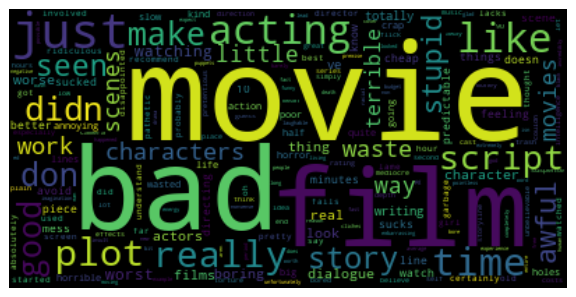

Exclusively IMDB negative reviews word cloud


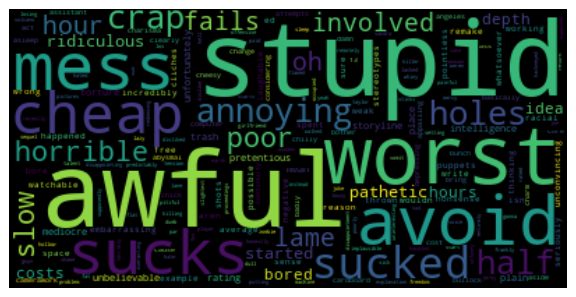

Positive IMDB reviews word cloud


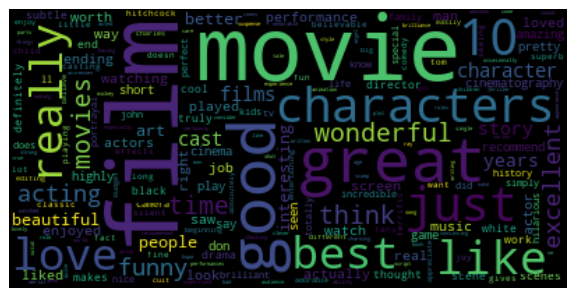

Exclusively IMDB positive reviews word cloud


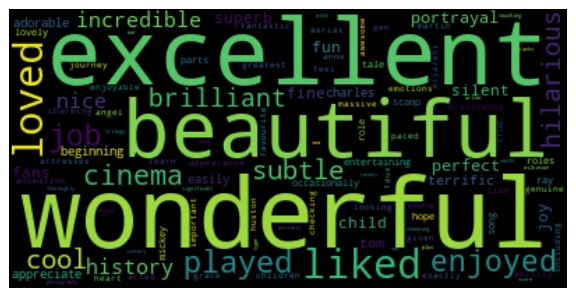

In [37]:
# Plot word cloud for IMDB negative sentiment reviews
print("Negative IMDB reviews word cloud")
plot_word_cloud(neg_freq_imdb['frequency'].to_dict())

# Plot word cloud for IMDB negative sentiment reviews, removing words that appear in positive sentiment reviews
print("Exclusively IMDB negative reviews word cloud")
neg_only_freq_imdb = neg_freq_imdb[~neg_freq_imdb.index.isin(pos_freq_imdb.index.tolist())]
plot_word_cloud(neg_only_freq_imdb['frequency'].to_dict())

# Plot word cloud for IMDB positive sentiment reviews
print("Positive IMDB reviews word cloud")
plot_word_cloud(pos_freq_imdb['frequency'].to_dict())

# Plot word cloud for IMDB positive sentiment reviews, removing words that appear in negative sentiment reviews
print("Exclusively IMDB positive reviews word cloud")
pos_only_freq_imdb = pos_freq_imdb[~pos_freq_imdb.index.isin(neg_freq_imdb.index.tolist())]
plot_word_cloud(pos_only_freq_imdb['frequency'].to_dict())

In [38]:
# Create TD-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
# We vectorize the text, removing accents, punctuation, stop_words and making everything lowercase
vectorizer = TfidfVectorizer(
    lowercase=True, 
    stop_words='english', 
    strip_accents='ascii'
)
word_counts_tfidf = vectorizer.fit_transform(df.sentence)

In [39]:
docs_to_words_tfidf_df = pd.DataFrame(
    word_counts_tfidf.toarray(), 
    columns = vectorizer.get_feature_names(), 
    index = df.index)
docs_to_words_tfidf_df['special_score'] = df['score']
docs_to_words_tfidf_df['special_source'] = df['source']

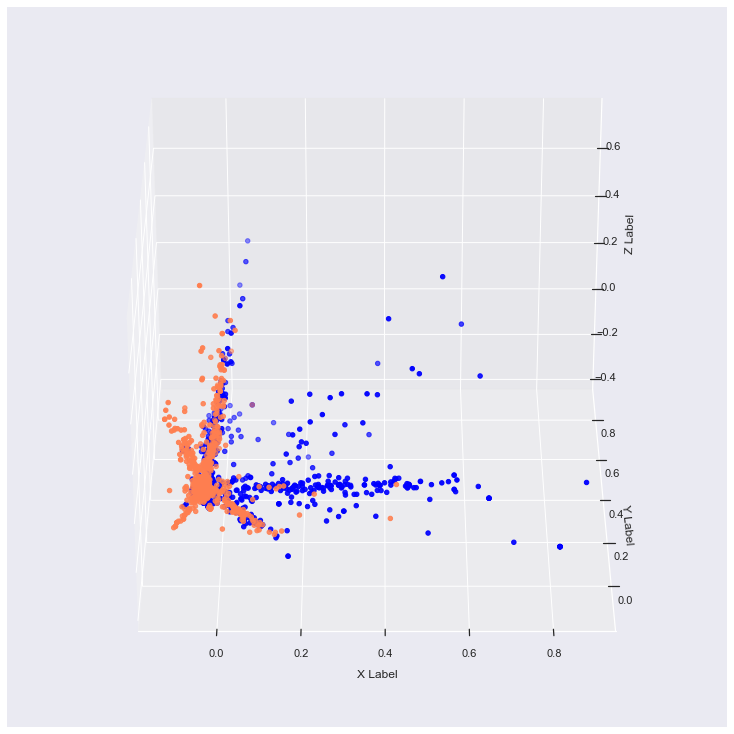

In [40]:
word_counts_reduced = PCA(n_components = 3).fit_transform(word_counts_tfidf.toarray())

scores = [0, 1]

# 3d plot based on score
make_3d_plot(word_counts_reduced, df['score'], scores, 30, 270)

Using TD-IDF we obtain a different plot, but we still have the blue dots (score 1) more spread across the 3 axes than the orange dots (score 0).

In [41]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb.fit(word_counts, df['score'].values)

MultinomialNB()

In [42]:
test_data = pd.Series([
    'food is crap',                     # negative
    'Best restaurant in town',          # positive
    'didn\'t work well at all',         # negative
    
    'not good',                         # negative
    'you better not go there',          # negative
    'the waiter was a good for nothing' # positive
])

mnb.predict(count_vect.transform(test_data).toarray())

array([0., 1., 0., 1., 1., 1.])

We can see that the word frequency model predicts the first 3 sentences correctly.
I added some 'more difficult' sentences and they are not being predicted correctly.
My guess is that by removing stopwords we decreased the model's power - especially the word 'not'.

In [43]:
# Create a new tokenization, this time without removing stopwords
count_vect_stopwords = CountVectorizer(
    lowercase=True, 
    strip_accents='ascii'
)
word_counts_stopwords = count_vect_stopwords.fit_transform(df.sentence)

mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb.fit(word_counts_stopwords, df['score'].values)
mnb.predict(count_vect_stopwords.transform(test_data).toarray())

array([0., 1., 0., 0., 0., 0.])

As predicted the model now can correctly classify all 6 test sentences.
We will now train the model based on TD-IDF, without removing the stopwords.

In [44]:
# We vectorize the text, this time without removing stopwords
vectorizer_stopwords = TfidfVectorizer(
    lowercase=True, 
    strip_accents='ascii'
)
word_counts_tfidf_stopwords = vectorizer_stopwords.fit_transform(df.sentence)

In [46]:
mnb_2 = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb_2.fit(word_counts_tfidf_stopwords, df['score'].values)
mnb_2.predict(vectorizer_stopwords.transform(test_data).toarray())

array([0., 1., 0., 0., 0., 0.])

Also the model trained using TD-IDF can correctly predict the test sentences.
Now, this was an explorative exercise, which actually proved useful at identifying a big fault with the models. If we want to compare the models we'll have to train them in a subset of the data (train set) and evaluate them on unseen data (test set).

In [70]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df)

# Train word frequency model on training set
final_count_vect = CountVectorizer(lowercase=True, strip_accents='ascii')
final_word_counts = final_count_vect.fit_transform(train_df.sentence)

final_mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
final_mnb.fit(final_word_counts, train_df.score.values)

# Train td-idf frequency model on training set
final_vectorizer = TfidfVectorizer(lowercase=True, strip_accents='ascii')
final_word_counts_tfidf = final_vectorizer.fit_transform(train_df.sentence)

final_mnb_td_idf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
final_mnb_td_idf.fit(final_word_counts_tfidf, train_df.score.values)

MultinomialNB()

In [72]:
final_mnb_acc = final_mnb.score(final_count_vect.transform(test_df.sentence), test_df['score'].values)
print(f'Word frequency mean accuracy: {final_mnb_acc}')
final_mnb_td_idf_acc = final_mnb_td_idf.score(final_vectorizer.transform(test_df.sentence), test_df['score'].values)
print(f'Word frequency TD-IDF: {final_mnb_td_idf_acc}')

Word frequency mean accuracy: 0.8173333333333334
Word frequency TD-IDF: 0.824


The accuracies achieved by the 2 models are pretty similar, and due to the limited size of both training and test data